In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [91]:
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Cereberal_Dataset.csv')

In [92]:
df.shape

(43400, 12)

In [93]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [94]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# **Handling Missing Values**


In [95]:
df = df.drop(['id'], axis=1)

In [96]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [98]:
# Handle missing values by filling with mode
most_frequent_symptom = df['smoking_status'].mode()[0]
most_frequent_symptom

'never smoked'

In [99]:
df['smoking_status'].fillna(most_frequent_symptom, inplace=True)

In [100]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [101]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#**Finding Duplicates**

In [102]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    duplicate_columns = df.columns[df.duplicated(keep=False).any()]
    print("Columns with Duplicates:")
    print(duplicate_columns)
else:
    print("No duplicates found.")

No duplicates found.


In [103]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


#**Handling Outliers**

In [104]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


In [105]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [106]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    upper = np.where(df[column] > upper_bound)
    lower = np.where(df[column] < lower_bound)
    upper_count = len(upper[0])
    lower_count = len(lower[0])
    print(f'Outliers in {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of upper outliers: {upper_count}')
    print(f'Number of lower outliers: {lower_count}')
    print(f'Upper outliers indices: {upper}')
    print(f'Lower outliers indices: {lower}')
    print()

cols = ['age', 'avg_glucose_level', 'bmi']

# Detect outliers for each numerical column
for col in cols:
    detect_outliers(df, col)

Outliers in age:
Lower bound: -30.0, Upper bound: 114.0
Number of upper outliers: 0
Number of lower outliers: 0
Upper outliers indices: (array([], dtype=int64),)
Lower outliers indices: (array([], dtype=int64),)

Outliers in avg_glucose_level:
Lower bound: 25.745000000000026, Upper bound: 163.86499999999998
Number of upper outliers: 4978
Number of lower outliers: 0
Upper outliers indices: (array([    5,     7,     9, ..., 43388, 43390, 43396]),)
Lower outliers indices: (array([], dtype=int64),)

Outliers in bmi:
Lower bound: 9.599999999999994, Upper bound: 46.400000000000006
Number of upper outliers: 1084
Number of lower outliers: 0
Upper outliers indices: (array([    5,     9,    21, ..., 43279, 43355, 43396]),)
Lower outliers indices: (array([], dtype=int64),)



In [107]:
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
cols = ['avg_glucose_level', 'bmi']
for col in cols:
    cap_outliers(df, col)


#**Exploratory Data Analysis (EDA)**

In [108]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


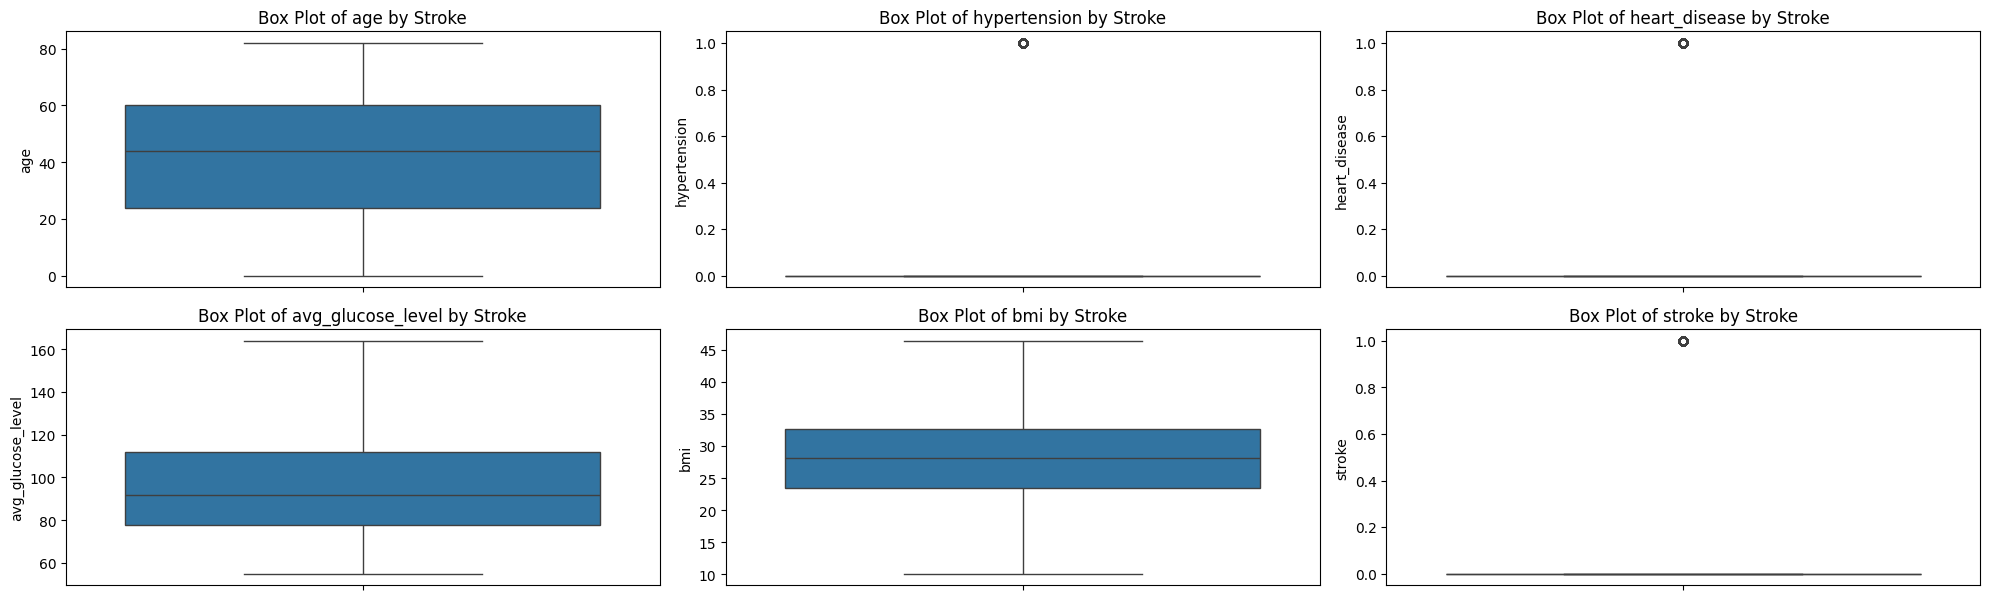

In [109]:
# Box plot for numerical cols
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col} by Stroke')
plt.tight_layout()
plt.show()


Observation: From the above box plots, we can observe that there are no outliers present in our dataset.

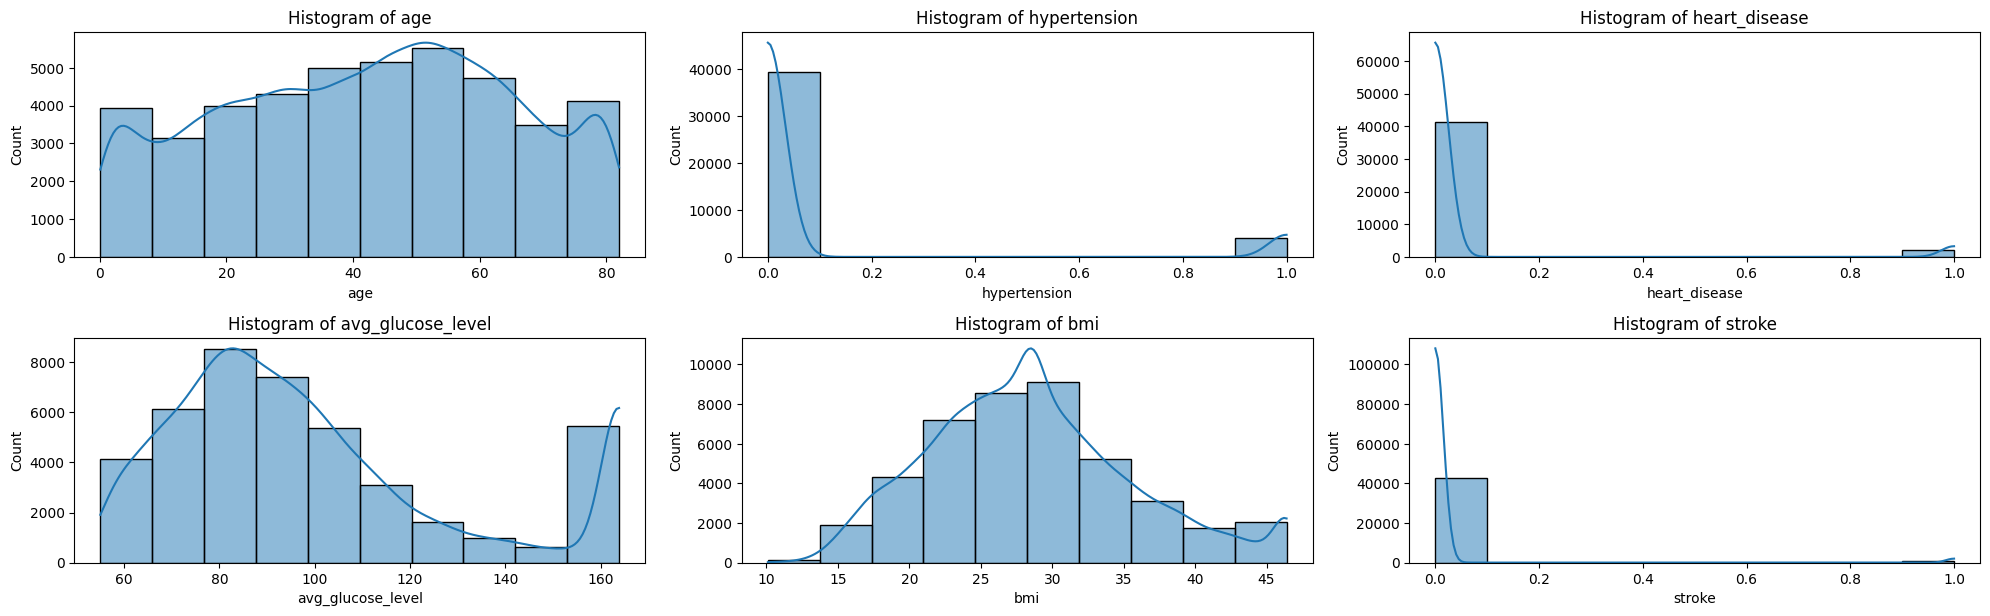

In [110]:
# Histogram for all numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Observation:
*   Age: Fairly uniform distribution with a slight concentration around 50-60 years.
*   Hypertension: Majority of individuals do not have hypertension.
*   Heart Disease: Majority of individuals do not have heart disease.
*   Average Glucose Level: Distribution peaks around 80-90, with fewer individuals at extreme low and high levels.

*   BMI: Wide range of values with a peak around 25-30, and fewer individuals at very high BMI values.

*   Stroke: Majority of individuals have not experienced a stroke.



In [111]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


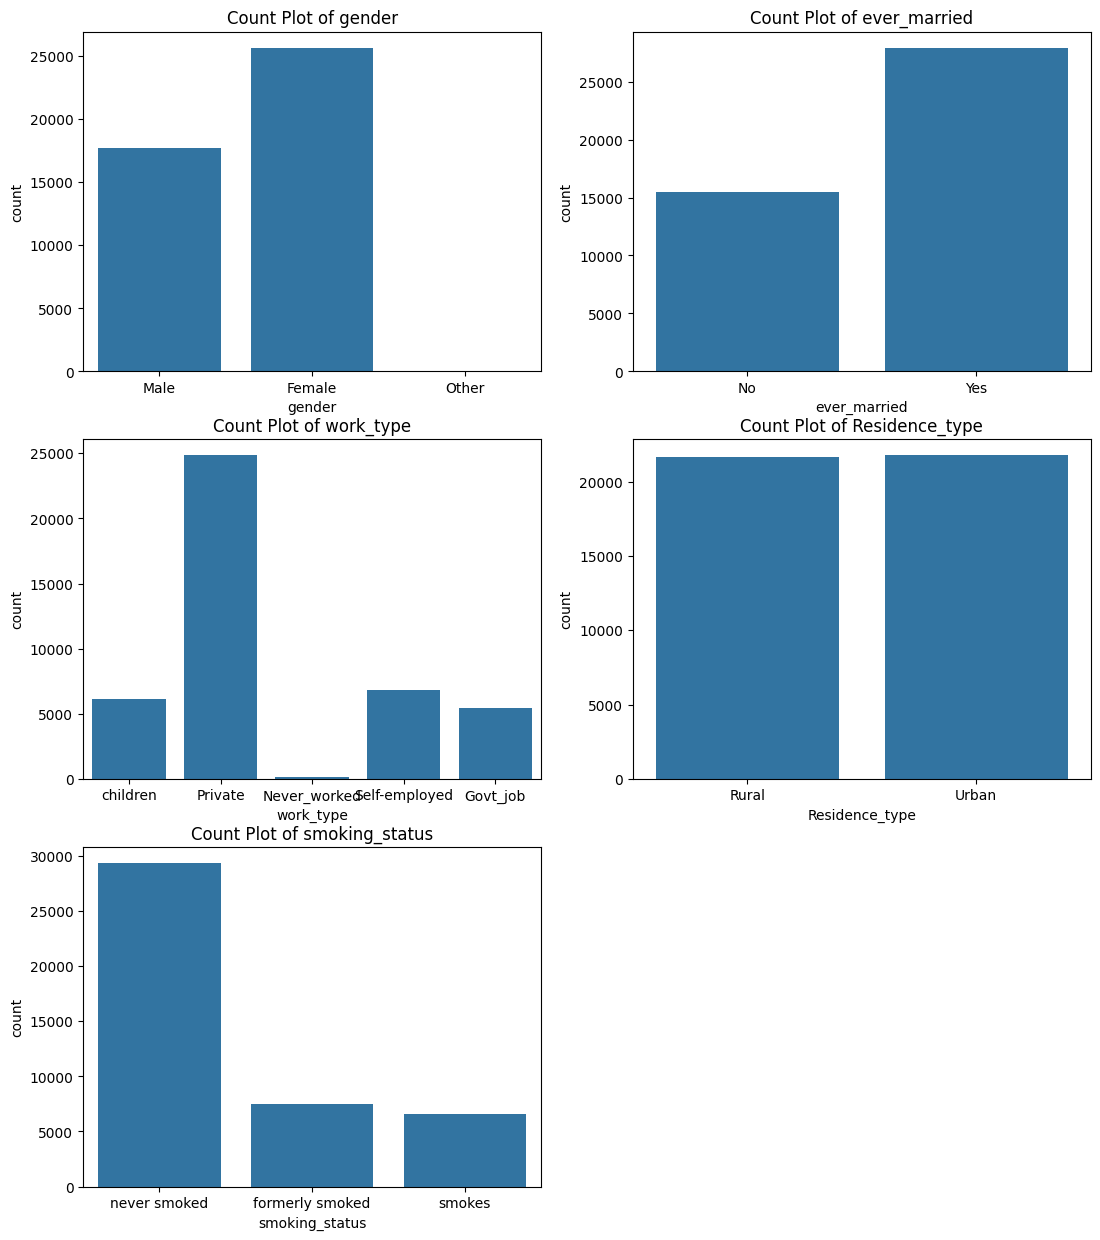

In [112]:
# count plot for categorical columns
plt.figure(figsize=(13, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')

Observation:

*   Gender: More females than males, with "Other" having negligible count.
*   Marital Status: More individuals have been married than not.
*   Work Type: Most are in "Private" jobs, followed by "Children". "Self-employed" and "Govt_job" are less common, and "Never_worked" is the least.
*   Residence Type: Nearly equal distribution between "Rural" and "Urban".
*   Smoking status: Majority of individuals in the dataset have never smoked, followed by those who have quit smoking, with the fewest being current smokers.


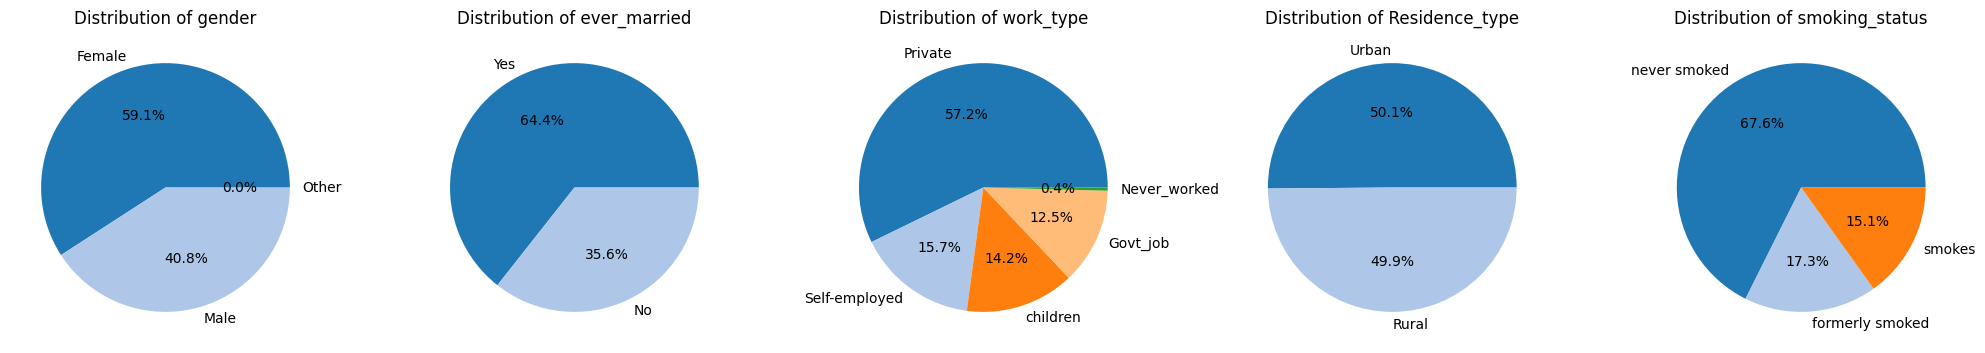

In [113]:
n_rows = 1
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], colors=plt.cm.tab20.colors)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observation:

*   Gender: More females (59.1%) than males (40.8%).
*   Marital Status: Most have been married (64.4%).
*   Work Type: Predominantly private sector jobs (57.2%), followed by self-employed (15.7%) and government jobs (12.5%).
*   Residence Type: Nearly equal urban (50.1%) and rural (49.9%) distribution.
*   Smoking Status: Majority never smoked (67.6%), with 17.3% formerly smoked, and 15.1% currently smoke.

####Comparitive Analysis

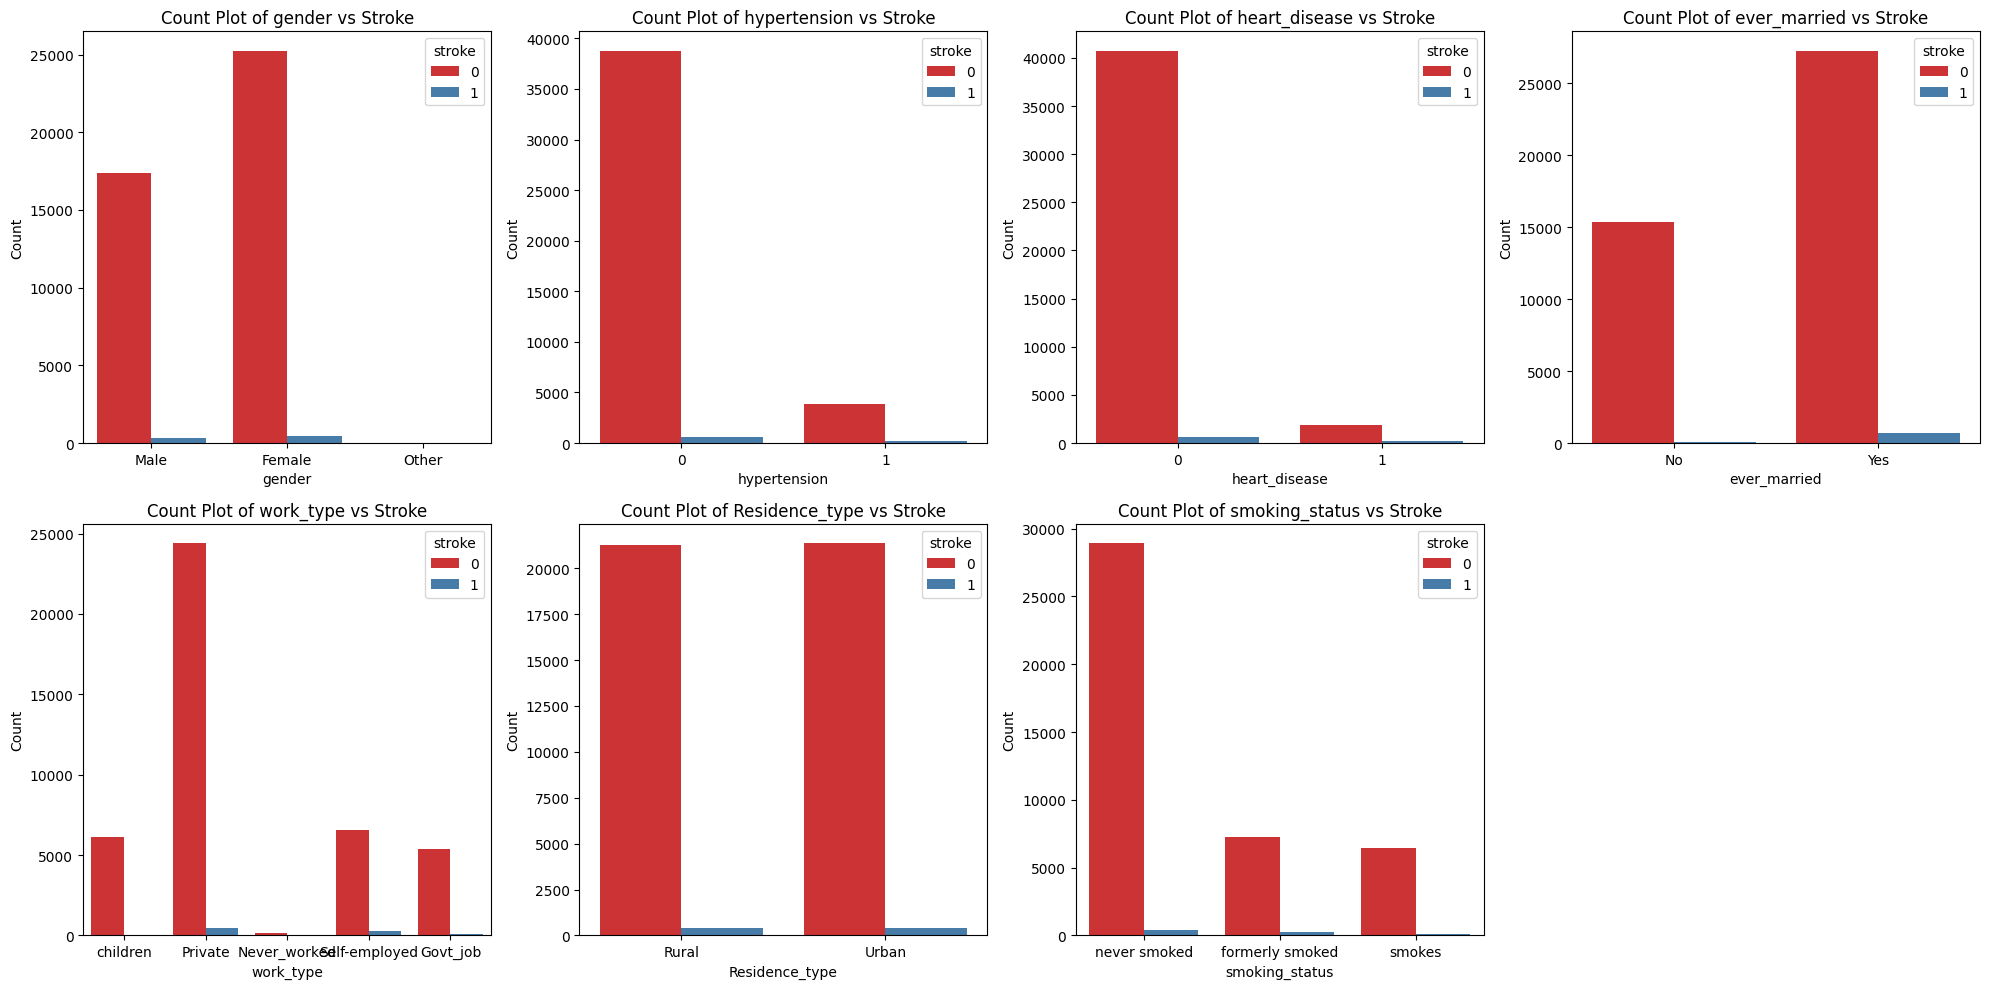

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# categorical columns vs stroke
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'smoking_status']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i], palette='Set1')
    axes[i].set_title(f'Count Plot of {col} vs Stroke')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any remaining empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observation:

*   Gender vs Stroke: More strokes in females compared to males, but both genders predominantly have no strokes.
*   Marital Status vs Stroke: Slightly higher stroke occurrence in married individuals.
*   Work Type vs Stroke: Higher stroke occurrence in self-employed, government jobs, and those never worked.
*   Residence Type vs Stroke: Slightly higher stroke occurrence in urban residents.
*   Smoking Status vs Stroke: Higher stroke occurrence in current and former smokers.


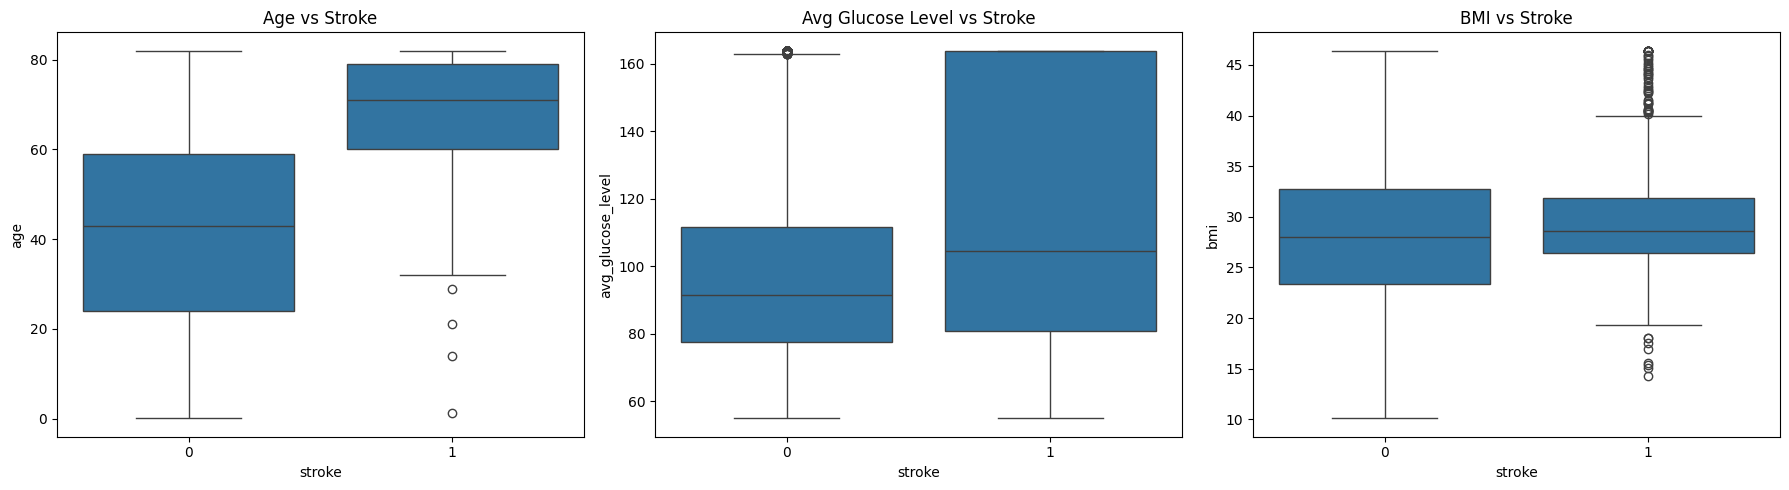

In [115]:
# Comparing numerical columns with stroke
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(ax=axes[0], data=df, x='stroke', y='age')
axes[0].set_title('Age vs Stroke')

sns.boxplot(ax=axes[1], data=df, x='stroke', y='avg_glucose_level')
axes[1].set_title('Avg Glucose Level vs Stroke')

sns.boxplot(ax=axes[2], data=df, x='stroke', y='bmi')
axes[2].set_title('BMI vs Stroke')

plt.tight_layout()
plt.show()

Observation:

*   Age vs Stroke: Stroke patients are generally older, with a higher median age compared to non-stroke individuals.
*   Avg Glucose Level vs Stroke: Stroke patients have higher median glucose levels and greater variability in glucose levels.
*   BMI vs Stroke: Stroke patients have a slightly higher median BMI and more outliers, indicating higher BMI might be associated with stroke risk.



##**Data Balancing**

stroke
0    42617
1      783
Name: count, dtype: int64


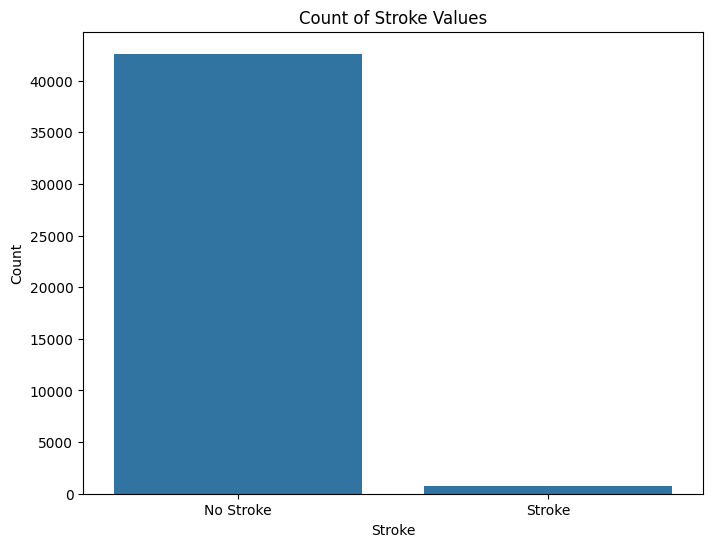

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = df['stroke'].value_counts()
print(value_counts)

# Bar graph for stroke value counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke')
plt.title('Count of Stroke Values')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


In [117]:
# print categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [118]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

# Print the mapping for each column with numbering
for col in label_encoders:
    le = label_encoders[col]
    mapping = {i: label for i, label in enumerate(le.classes_)}
    print(f'{col}: {mapping}')


gender: {0: 'Female', 1: 'Male', 2: 'Other'}
ever_married: {0: 'No', 1: 'Yes'}
work_type: {0: 'Govt_job', 1: 'Never_worked', 2: 'Private', 3: 'Self-employed', 4: 'children'}
Residence_type: {0: 'Rural', 1: 'Urban'}
smoking_status: {0: 'formerly smoked', 1: 'never smoked', 2: 'smokes'}


##**SMOTE- Synthetic Minority Oversampling Technique**

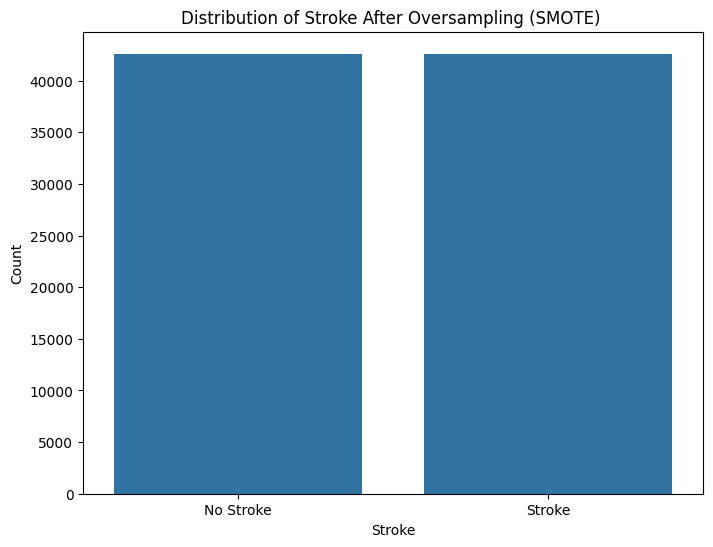

stroke
0    42617
1    42617
Name: count, dtype: int64


In [119]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['stroke'])
y = df['stroke']

smote = SMOTE(random_state=42)

X_sampled, y_sampled = smote.fit_resample(X, y)


new_data = pd.DataFrame(X_sampled, columns=X.columns)
new_data['stroke'] = y_sampled


stroke_count = new_data['stroke'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_count.index, y=stroke_count.values)
plt.title('Distribution of Stroke After Oversampling (SMOTE) ')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

print(stroke_count)

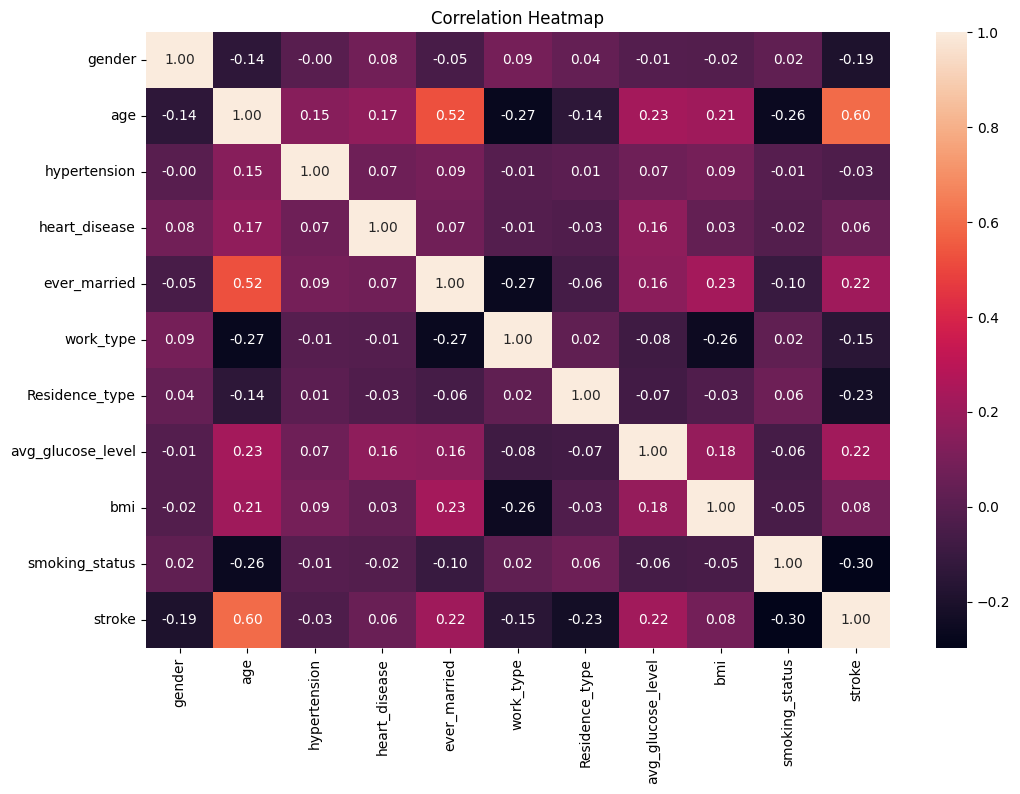

In [120]:
# Heatmap for correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Stroke:




*   Positively correlated with age (0.60), ever_married (0.22), and avg_glucose_level(0.22)
*   other heart_disease,bmi



##**Feature Engineering**

In [123]:
new_data.shape

(85234, 11)

In [124]:
new_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [125]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0


###Scaling the data

In [126]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'bmi', 'avg_glucose_level']


scaler = StandardScaler()

X_sampled[numerical_cols] = scaler.fit_transform(X_sampled[numerical_cols])

print("Sample of Scaled Data:")
print(X_sampled.sample(5))

Sample of Scaled Data:
       gender       age  hypertension  heart_disease  ever_married  work_type  \
28363       1 -0.225649             0              0             1          0   
38356       1 -0.046436             0              0             1          2   
70038       0  0.670418             0              0             1          2   
75340       0  1.109955             0              0             1          2   
20885       0  0.132778             0              0             1          0   

       Residence_type  avg_glucose_level       bmi  smoking_status  
28363               1          -0.517963 -0.346944               0  
38356               1           0.050792 -1.065489               1  
70038               1          -0.497739  0.905174               0  
75340               1           1.593052 -0.213972               1  
20885               1          -0.528626 -0.123396               1  


#**Feature Selection**

###Fillter Approach-Information Gain

In [127]:
import numpy as np

def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def conditional_entropy(y, x):
    unique_values, value_counts = np.unique(x, return_counts=True)
    probabilities = value_counts / len(x)
    conditional_entropy = 0
    for value, prob in zip(unique_values, probabilities):
        conditional_entropy += prob * entropy(y[x == value])
    return conditional_entropy

def information_gain(y, x):
    return entropy(y) - conditional_entropy(y, x)

# Use the oversampled data for calculating information gain
Y_sampled = new_data['stroke']
X_sampled = new_data.drop(columns=['stroke'])

# Calculate information gain for each feature
info_gains = {feature: information_gain(Y_sampled, X_sampled[feature]) for feature in X_sampled.columns}

# Sort information gains in descending order
sorted_info_gains = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)

# Print information gains in descending order
print("Information Gains (Descending Order):")
for feature, ig in sorted_info_gains:
    print(f"{feature}: {ig:.4f}")

# Select top features with information gain > 0.1
top_features = [feature for feature, ig in sorted_info_gains if ig > 0.1]
print("Top Features:", top_features)

# Select the top features from the dataset
X_selected = X_sampled[top_features]


Information Gains (Descending Order):
bmi: 0.8768
avg_glucose_level: 0.7994
age: 0.7325
work_type: 0.1005
smoking_status: 0.0670
Residence_type: 0.0388
ever_married: 0.0341
gender: 0.0272
heart_disease: 0.0022
hypertension: 0.0007
Top Features: ['bmi', 'avg_glucose_level', 'age', 'work_type']


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a list of models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y_sampled, test_size=0.2, random_state=42)

# Iterate through each model
for model_name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print results
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print()


Logistic Regression:
Accuracy: 0.7699
Confusion Matrix:
[[6170 2330]
 [1593 6954]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      8500
           1       0.75      0.81      0.78      8547

    accuracy                           0.77     17047
   macro avg       0.77      0.77      0.77     17047
weighted avg       0.77      0.77      0.77     17047


Decision Tree:
Accuracy: 0.9669
Confusion Matrix:
[[8218  282]
 [ 282 8265]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8500
           1       0.97      0.97      0.97      8547

    accuracy                           0.97     17047
   macro avg       0.97      0.97      0.97     17047
weighted avg       0.97      0.97      0.97     17047


Random Forest:
Accuracy: 0.9684
Confusion Matrix:
[[8224  276]
 [ 262 8285]]
Classification Report:
              precision    recall  f1-

###Fillter Approach-Mutual Information


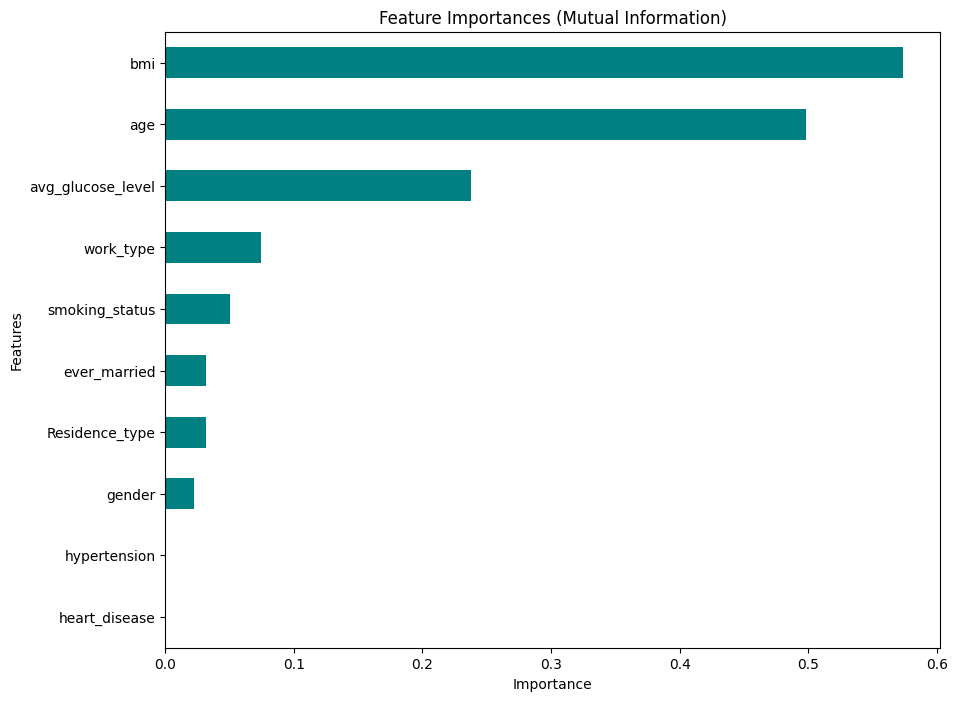

Top Features (Mutual Information): ['age', 'avg_glucose_level', 'bmi']


In [129]:
from sklearn.feature_selection import mutual_info_classif

# Use the oversampled data for calculating mutual information
Y_sampled = new_data['stroke']
X_sampled = new_data.drop(columns=['stroke'])

# Calculate mutual information for each feature
importances = mutual_info_classif(X_sampled, Y_sampled)
feat_importances = pd.Series(importances, index=X_sampled.columns)

# Plot feature importances
plt.figure(figsize=(10, 8))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importances (Mutual Information)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Select top features with mutual information > 0.1
top_features_mi = feat_importances[feat_importances > 0.1].index.tolist()
print("Top Features (Mutual Information):", top_features_mi)

# Select the top features from the dataset
X_selected_mi = X_sampled[top_features_mi]


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a list of models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

# Split the data into training and testing sets
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_selected_mi, Y_sampled, test_size=0.2, random_state=42)

# Iterate through each model
for model_name, model in models:
    # Fit the model
    model.fit(X_train_mi, y_train_mi)

    # Predict on the test set
    y_pred_mi = model.predict(X_test_mi)

    # Evaluate the model
    accuracy_mi = accuracy_score(y_test_mi, y_pred_mi)
    conf_matrix_mi = confusion_matrix(y_test_mi, y_pred_mi)
    class_report_mi = classification_report(y_test_mi, y_pred_mi)

    # Print results
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_mi:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix_mi)
    print("Classification Report:")
    print(class_report_mi)
    print()


Logistic Regression:
Accuracy: 0.7694
Confusion Matrix:
[[6181 2319]
 [1612 6935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      8500
           1       0.75      0.81      0.78      8547

    accuracy                           0.77     17047
   macro avg       0.77      0.77      0.77     17047
weighted avg       0.77      0.77      0.77     17047


Decision Tree:
Accuracy: 0.9603
Confusion Matrix:
[[8159  341]
 [ 335 8212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8500
           1       0.96      0.96      0.96      8547

    accuracy                           0.96     17047
   macro avg       0.96      0.96      0.96     17047
weighted avg       0.96      0.96      0.96     17047


Random Forest:
Accuracy: 0.9569
Confusion Matrix:
[[8110  390]
 [ 344 8203]]
Classification Report:
              precision    recall  f1-

###Fillter Approach-Fisher Score(ANOVA Test)

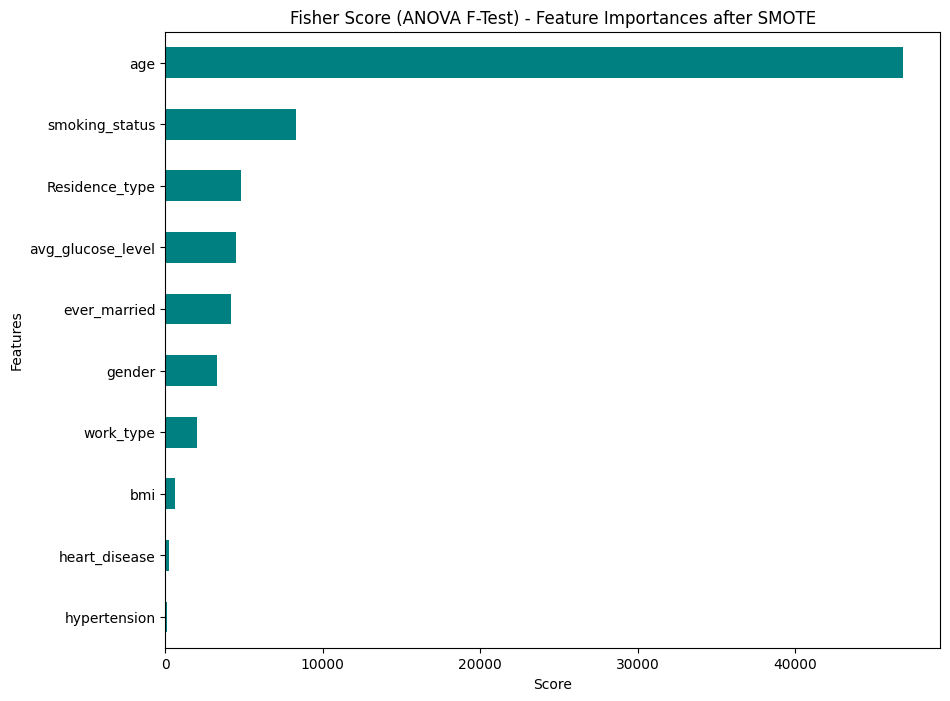

In [131]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# SelectKBest with Fisher Score
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_sampled, y_sampled)
scores = selector.scores_
feat_importances = pd.Series(scores, index=X.columns)

# Plot the Fisher scores
plt.figure(figsize=(10, 8))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Fisher Score (ANOVA F-Test) - Feature Importances after SMOTE')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()


In [132]:
top_N_features = feat_importances.sort_values(ascending=False).head(5).index
print("Top Features:", top_N_features)
X_selected_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

X_selected_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])

X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y_sampled, test_size=0.2, random_state=42)


models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]


for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print()


Top Features: Index(['age', 'smoking_status', 'Residence_type', 'avg_glucose_level',
       'ever_married'],
      dtype='object')
Logistic Regression:
Accuracy: 0.8033
Confusion Matrix:
[[6669 1831]
 [1522 7025]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      8500
           1       0.79      0.82      0.81      8547

    accuracy                           0.80     17047
   macro avg       0.80      0.80      0.80     17047
weighted avg       0.80      0.80      0.80     17047


Decision Tree:
Accuracy: 0.9549
Confusion Matrix:
[[8008  492]
 [ 277 8270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8500
           1       0.94      0.97      0.96      8547

    accuracy                           0.95     17047
   macro avg       0.96      0.95      0.95     17047
weighted avg       0.96      0.95      0.95     17047


Random 

###Fillter Approach- Chi-Square

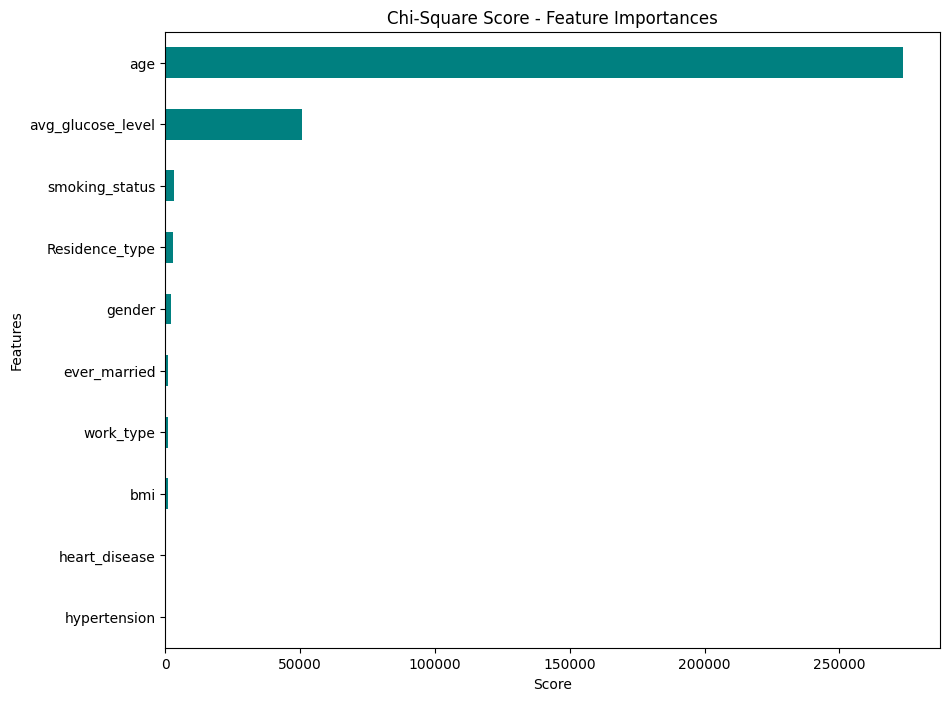

In [133]:
from sklearn.feature_selection import SelectKBest, chi2
# SelectKBest with Chi-Square Score
selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X_sampled, Y_sampled)

scores = selector.scores_
feat_importances = pd.Series(scores, index=X.columns)

plt.figure(figsize=(10, 8))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Chi-Square Score - Feature Importances')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()


In [134]:
# Select top N features based on Chi-Square score
top_N_features = feat_importances.sort_values(ascending=False).head(9).index
print("Top Features:", top_N_features)
X_selected_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_selected_df[top_N_features], Y_sampled, test_size=0.2, random_state=42)

# Define models in a list with their names
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

# Iterate over models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print()


Top Features: Index(['age', 'avg_glucose_level', 'smoking_status', 'Residence_type',
       'gender', 'ever_married', 'work_type', 'bmi', 'heart_disease'],
      dtype='object')
Logistic Regression:
Accuracy: 0.7950
Confusion Matrix:
[[6571 1929]
 [1566 6981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      8500
           1       0.78      0.82      0.80      8547

    accuracy                           0.79     17047
   macro avg       0.80      0.79      0.79     17047
weighted avg       0.80      0.79      0.79     17047


Decision Tree:
Accuracy: 0.9561
Confusion Matrix:
[[8039  461]
 [ 287 8260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8500
           1       0.95      0.97      0.96      8547

    accuracy                           0.96     17047
   macro avg       0.96      0.96      0.96     17047
weighted avg    